# A. Descriptive Statistics

Before modeling, we need to understand what the data is actually doing. Descriptive statistics are the first pass: simple numbers that summarize large, messy reality.  

This section explores what these statistics mean, when they mislead, and how the break in the presence of outliers.

## A.1 What descriptive statistics are (and are not)

Summaries compress information, and compression always loses detail.  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>What they do well</th>
            <th>What they hide</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Give fast orientation</td>
            <td>Multimodality and skew</td>
        </tr>
        <tr>
            <td>Enable comparisons</td>
            <td>Outliers adn tail risk</td>
        </tr>
        <tr>
            <td>Support sanity checks</td>
            <td>Group-level structure</td>
        </tr>
    </tbody>
</table>

**EDA RULE #1**
Never trust a single number without seeing the distribution it came from

### Microlab: One "average", two totally different realities  

Two datasets can share the same mean and still behave very differently. 

A mean: 10.0 A median: 10.0
B mean: 10.0 B median: 0.0


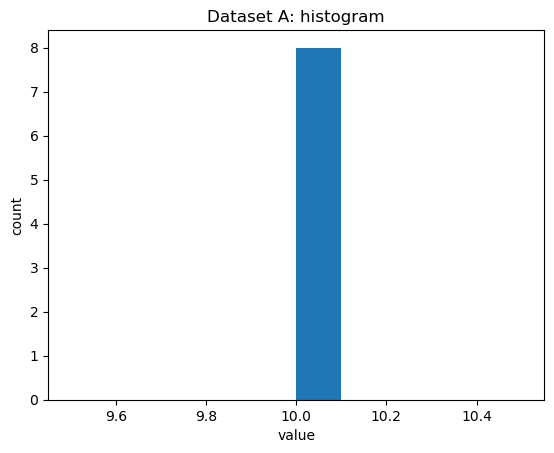

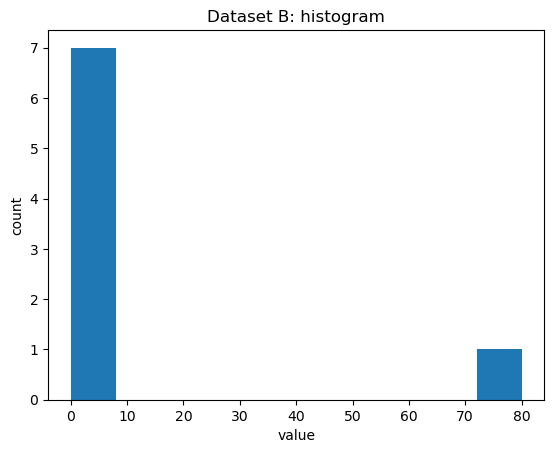

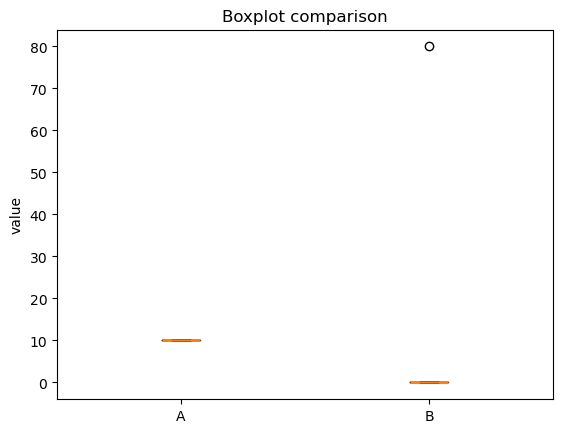


Key ideas:
1) The same mean can come from totally different distributions.
2) Descriptive stats compress information — the shape still matters.
3) Plots are not decoration; they're a sanity check on your summaries.

Try:
- Create dataset C with TWO modes (e.g., many 0s and many 20s). Same mean, new story.
- Add 2–3 moderate outliers instead of one extreme outlier — how do the plots change?
- Swap the histogram bins (10 vs 50). What stays the same? What changes?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

# Two datasets with the same mean (~10), very different shapes
a = pd.Series([10,10,10,10,10,10,10,10])
b = pd.Series([0,0,0,0,0,0,0,80])

print("A mean:", float(a.mean()), "A median:", float(a.median()))
print("B mean:", float(b.mean()), "B median:", float(b.median()))

plt.figure()
plt.hist(a, bins=10)
plt.title("Dataset A: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(b, bins=10)
plt.title("Dataset B: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.boxplot([a, b], tick_labels=["A", "B"])
plt.title("Boxplot comparison")
plt.ylabel("value")
plt.show()

print("\nKey ideas:")
print("1) The same mean can come from totally different distributions.")
print("2) Descriptive stats compress information — the shape still matters.")
print("3) Plots are not decoration; they're a sanity check on your summaries.")

print("\nTry:")
print("- Create dataset C with TWO modes (e.g., many 0s and many 20s). Same mean, new story.")
print("- Add 2–3 moderate outliers instead of one extreme outlier — how do the plots change?")
print("- Swap the histogram bins (10 vs 50). What stays the same? What changes?")

# A.2 Central Tendency

"Typical" depends on how your data misbehaves  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Statistic</th>
            <th>What it answers</th>
            <th>Failure mode</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Mean</td>
            <td>Average value</td>
            <td>Dragged by outliers</td>
        </tr>
        <tr>
            <td>Median</td>
            <td>Middle observation</td>
            <td>Ignores tail magnitude</td>
        </tr>
        <tr>
            <td>Mode</td>
            <td>Most common value</td>
            <td>Unstable / non-unique</td>
        </tr>
    </tbody>
</table>

### Microlab: Mean vs Median under skew (with plot)  

Add one extreme value, watch the mean move while the median stays put


Original:
 n: 7
 mean: 12.142857142857142
 median 12.0

With outlier:
 n: 8
 mean: 73.125
 median 12.5


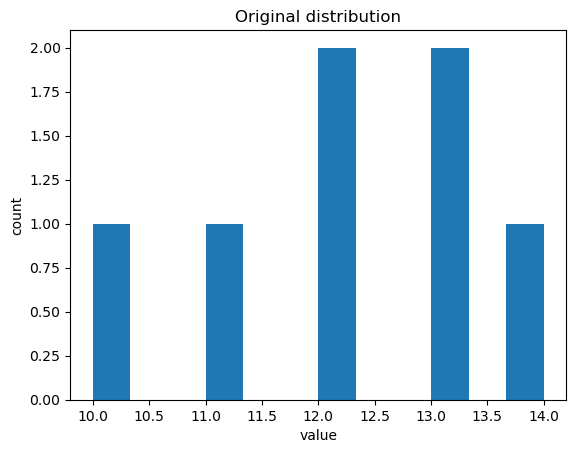

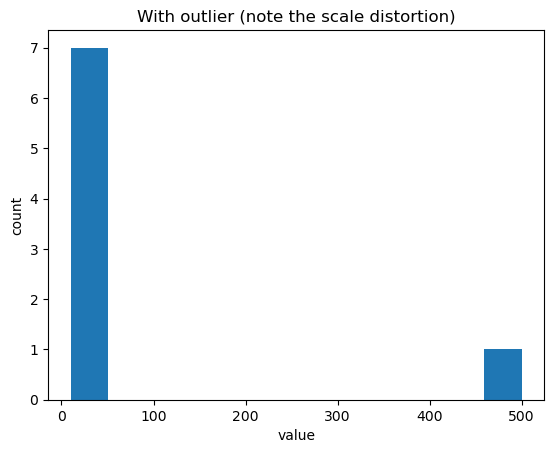

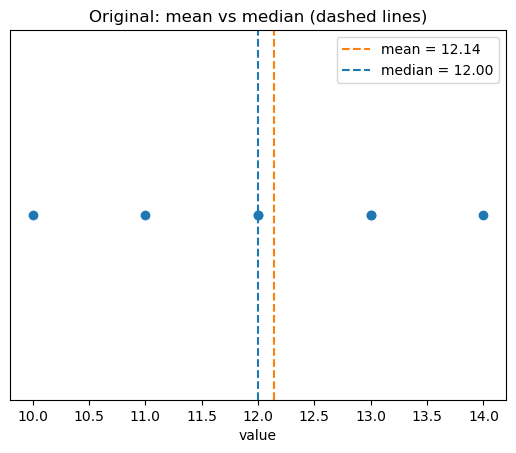

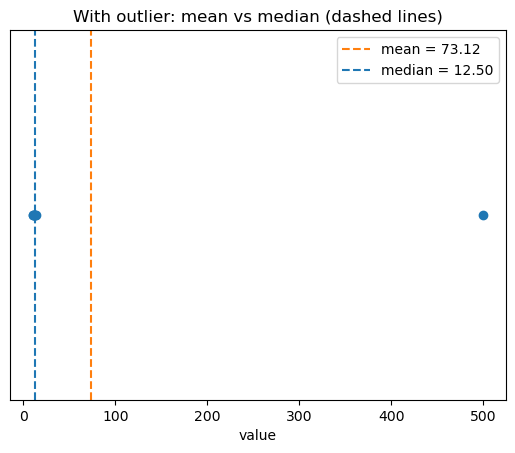


Key ideas:
1) Mean is sensitive to extreme values; median is robust.
2) 'Typical' depends on your decision context (risk vs average).
3) Always pair a center statistic with a plot of the distribution.

Try:
- Replace 500 with 40. Does the mean still feel misleading?
- Add TWO outliers (e.g., 200 and 500). What happens to mean vs median?
- Create a right-skewed dataset (e.g., exponential) and compare mean/median.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

data = pd.Series([10, 11, 12, 12, 13, 13, 14])
data_outlier = pd.concat([data, pd.Series([500])], ignore_index=True)

def summarize(x, name):
    print(f"\n{name}:")
    print(" n:", len(x))
    print(" mean:", float(x.mean()))
    print(" median", float(x.median()))

summarize(data, "Original")
summarize(data_outlier, "With outlier")

plt.figure()
plt.hist(data, bins=12)
plt.title("Original distribution")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(data_outlier, bins=12)
plt.title("With outlier (note the scale distortion)")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.plot(np.sort(data.values), np.zeros(len(data)), "o")
plt.axvline(
    data.mean(),
    linestyle="--",
    color="tab:orange",
    label=f"mean = {data.mean():.2f}"
)
plt.axvline(
    data.median(),
    linestyle="--",
    color="tab:blue",
    label=f"median = {data.median():.2f}"
)
plt.legend()
plt.title("Original: mean vs median (dashed lines)")
plt.yticks([])
plt.xlabel("value")
plt.show()

plt.figure()
plt.plot(np.sort(data_outlier.values),np.zeros(len(data_outlier)), "o")
plt.axvline(
    data_outlier.mean(),
    linestyle="--",
    color="tab:orange",
    label=f"mean = {data_outlier.mean():.2f}"
)
plt.axvline(
    data_outlier.median(),
    linestyle="--",
    color="tab:blue",
    label=f"median = {data_outlier.median():.2f}"
)
plt.legend()
plt.title("With outlier: mean vs median (dashed lines)")
plt.yticks([])
plt.xlabel("value")
plt.show()

print("\nKey ideas:")
print("1) Mean is sensitive to extreme values; median is robust.")
print("2) 'Typical' depends on your decision context (risk vs average).")
print("3) Always pair a center statistic with a plot of the distribution.")

print("\nTry:")
print("- Replace 500 with 40. Does the mean still feel misleading?")
print("- Add TWO outliers (e.g., 200 and 500). What happens to mean vs median?")
print("- Create a right-skewed dataset (e.g., exponential) and compare mean/median.")



## A.3 Spread and Variablity

Two datasets can share a mean and behave differently.  

<table style="text-align:left;">
    <caption style="font-weight: bold;">Common Measures of Spread</caption>
    <thead>
        <tr>
            <th>Statistic</th>
            <th>What it measures</th>
            <th>Sensitivity</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Range</td>
            <td>min &rarr; max</td>
            <td>Extremely sensitive</td>
        </tr>
        <tr>
            <td>Variance</td>
            <td>Average squared deviation</td>
            <td>Outliers dominate</td>
        </tr>
        <tr>
            <td>Standard Deviation</td>
            <td>Typical  deviation (&radic; variance)</td>
            <td>Outliers dominate</td>
        </tr>
        <tr>
            <td>IQR</td>
            <td>Spread of the middle 50%</td>
            <td>Robust to tails</td>
        </tr>
        <tr>
            <td>MAD</td>
            <td>Median absolute deviation from the median</td>
            <td>Highly robust</td>
        </tr>
    </tbody>
</table>

### Microlab: Spread changes everything  

Two datasets with the same mean: compare std dev vs IQR and visualize

A: mean 10.0 std 0.0 iqr 0.0 range 0.0
B: mean 10.0 std 6.670832032063167 iqr 10.0 range 16.0

Key ideas:
1) Mean does not tell you about risk; spread does.
2) Std dev is tail-sensitive; IQR summarizes the middle (robust).
3) Quantiles (p90/p95) often matter more than averages in real systems.

Try:
- Add a single extreme outlier to dataset B. Which spread metric changes most?
- Make dataset A slightly noisy (e.g., [9,10,10,10,11]). How do std and IQR react?
- Compare p90 and p95 for B — what do they say about tail risk?


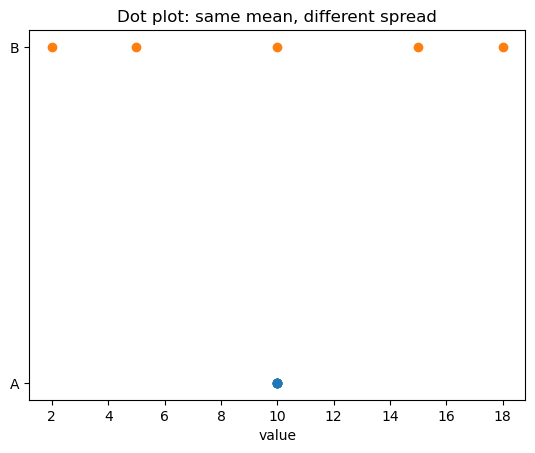

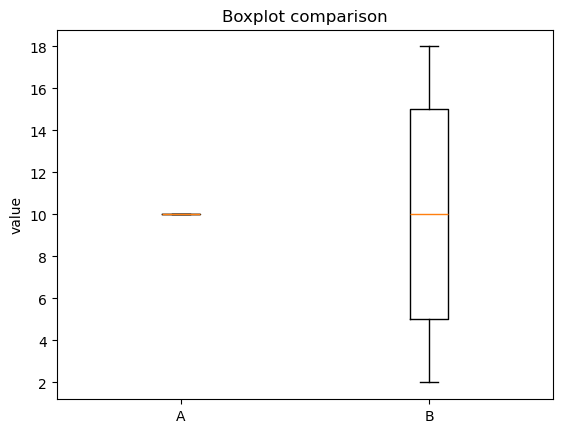

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

a = pd.Series([10, 10, 10, 10, 10])
b = pd.Series([2, 5, 10, 15, 18])

def iqr(x):
    return float(x.quantile(0.75) - x.quantile(0.25))

print("A: mean", float(a.mean()), "std", float(a.std(ddof=1)), "iqr", iqr(a), "range", float(a.max()-a.min()))
print("B: mean", float(b.mean()), "std", float(b.std(ddof=1)), "iqr", iqr(b), "range", float(b.max()-b.min()))

# Dot Plot
plt.figure()
plt.plot(np.sort(a.values), np.zeros(len(a)), "o", label="A")
plt.plot(np.sort(b.values), np.ones(len(b)), "o", label="B")
plt.yticks([0,1], ["A","B"])
plt.title("Dot plot: same mean, different spread")
plt.xlabel("value")
plt.show

# Box Plot
plt.figure()
plt.boxplot([a, b], tick_labels=["A", "B"])
plt.title("Boxplot comparison")
plt.ylabel("value")
plt.show

print("\nKey ideas:")
print("1) Mean does not tell you about risk; spread does.")
print("2) Std dev is tail-sensitive; IQR summarizes the middle (robust).")
print("3) Quantiles (p90/p95) often matter more than averages in real systems.")

print("\nTry:")
print("- Add a single extreme outlier to dataset B. Which spread metric changes most?")
print("- Make dataset A slightly noisy (e.g., [9,10,10,10,11]). How do std and IQR react?")
print("- Compare p90 and p95 for B — what do they say about tail risk?")

## Robust Statistics

Robust methods are designed to fail gracefully.

Real datasets contain errors, rare events, and heavy tails. Robust statistics reduce the influence of extreme values without pretending they do not exist.  

<table style="text-align:left;">
    <caption style="font-weight: bold;">Common Robust Alternatives</caption>
    <thead>
        <tr>
            <td>Instead of</td>
            <td>Use</td>
            <td>Why</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Mean</td>
            <td>Median</td>
            <td>Insensitive to extremes</td>
        </tr>
        <tr>
            <td>Std dev</td>
            <td>IQR / MAD</td>
            <td>Stable under contamination</td>
        </tr>
        <tr>
            <td>Raw values</td>
            <td>Winsorized values</td>
            <td>Limits tail influence</td>
        </tr>
    </tbody>
</table>

### Microlab: MAD vs Standard Deviation (with plot)  

Compare how two spread measures behave when your data has "contamination" (a rare extreme value). Standard deviation will blow up while MAD stays stable.  

One clean data vs contaminated data


Clean:
 mean: 12.875
 median: 12.5
 std: 2.03100960115899
 IQR: 2.5
 MAD: 1.5

Contaminated:
 mean: 33.666666666666664
 median: 13.0
 std: 62.403926158535896
 IQR: 3.0
 MAD: 2.0


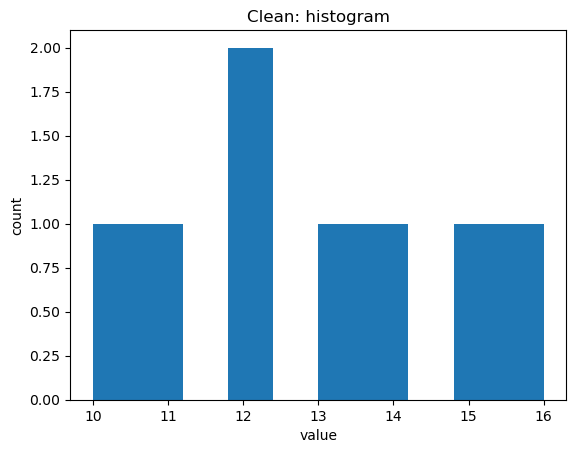

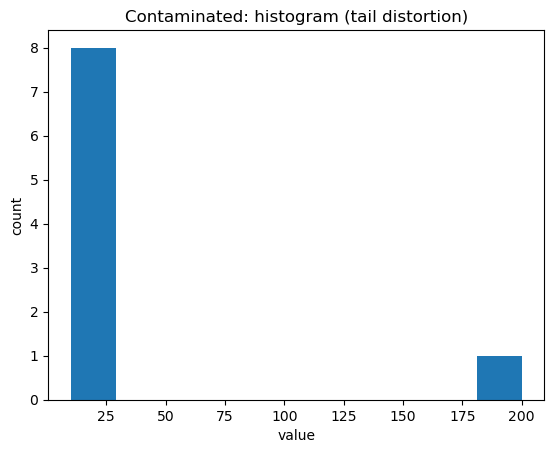

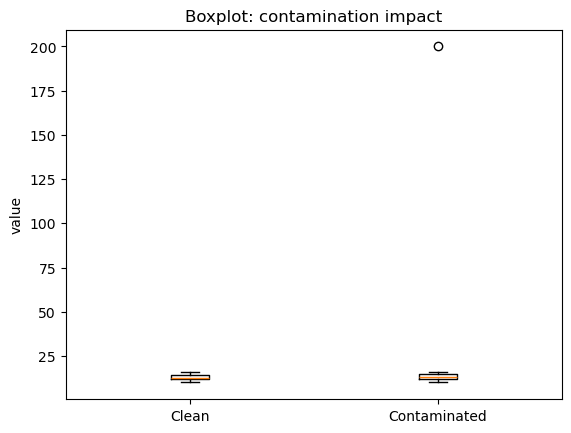


Key ideas:
1) Std dev is dominated by extremes; MAD is anchored to the median.
2) Robust stats don’t remove outliers — they reduce their influence on summaries.
3) In production data, robustness is often a necessity, not a preference.

Try:
- Replace 200 with 60. When does std dev start to diverge from MAD?
- Add multiple moderate outliers (e.g., 40, 60, 80) and compare again.
- Winsorize the contaminated data (clip to 1%–99%) and recompute std/MAD.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

clean = pd.Series([10, 11, 12, 12, 13, 14, 15, 16])
contaminated = pd.concat([clean, pd.Series([200])], ignore_index=True)

def mad(x):
    return float((x - x.median()).abs().median())

def iqr(x):
    return float(x.quantile(0.75) - x.quantile(0.25))

def summarize(x, name):
    print(f"\n{name}:")
    print(" mean:", float(x.mean()))
    print(" median:", float(x.median()))
    print(" std:", float(x.std(ddof=1)))
    print(" IQR:", iqr(x))
    print(" MAD:", mad(x))

summarize(clean, "Clean")
summarize(contaminated, "Contaminated")

# Histogram - clean data
plt.figure()
plt.hist(clean, bins=10)
plt.title("Clean: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show

# Histogram - contaminated data
plt.figure()
plt.hist(contaminated, bins=10)
plt.title("Contaminated: histogram (tail distortion)")
plt.xlabel("value")
plt.ylabel("count")
plt.show

# Boxplot - compare
plt.figure()
plt.boxplot([clean, contaminated], tick_labels=["Clean", "Contaminated"])
plt.title("Boxplot: contamination impact")
plt.ylabel("value")
plt.show()

print("\nKey ideas:")
print("1) Std dev is dominated by extremes; MAD is anchored to the median.")
print("2) Robust stats don’t remove outliers — they reduce their influence on summaries.")
print("3) In production data, robustness is often a necessity, not a preference.")

print("\nTry:")
print("- Replace 200 with 60. When does std dev start to diverge from MAD?")
print("- Add multiple moderate outliers (e.g., 40, 60, 80) and compare again.")
print("- Winsorize the contaminated data (clip to 1%–99%) and recompute std/MAD.")

## A.5 Lab Excercise

In Lab Notebook